In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hugs_pipe as hp
import lsstutils
import lsst.daf.persistence

In [2]:
tract = 9317
patch = '1,1'
config = hp.Config(tract=tract, patch=patch)
results = hp.run(config, debug_return=True, randoms_only=True)

hugs-pipe: 9317 | 1,1: 05/08 16:49:50 INFO: starting hugs-pipe with config file /home/jgreco/projects/hugs-pipe/hugs_pipe/default_config.yml


INFO:hugs-pipe: 9317 | 1,1:starting hugs-pipe with config file /home/jgreco/projects/hugs-pipe/hugs_pipe/default_config.yml


hugs-pipe: 9317 | 1,1: 05/08 16:50:01 INFO: performing low threshold at 3.0 sigma


INFO:hugs-pipe: 9317 | 1,1:performing low threshold at 3.0 sigma


hugs-pipe: 9317 | 1,1: 05/08 16:50:03 INFO: performing high threshold at 28.0 sigma


INFO:hugs-pipe: 9317 | 1,1:performing high threshold at 28.0 sigma


hugs-pipe: 9317 | 1,1: 05/08 16:50:04 INFO: generating cleaned exposure


INFO:hugs-pipe: 9317 | 1,1:generating cleaned exposure


hugs-pipe: 9317 | 1,1: 05/08 16:50:08 INFO: finding detectable randoms in patch


INFO:hugs-pipe: 9317 | 1,1:finding detectable randoms in patch


hugs-pipe: 9317 | 1,1: 05/08 16:50:12 INFO: task completed in 0.19 min


INFO:hugs-pipe: 9317 | 1,1:task completed in 0.19 min


In [3]:
exp_clean = results.exp_clean
df = results.randoms_results.df

In [6]:
wcs = exp_clean.getWcs()
xy0 = exp_clean.getXY0()
coords = lsstutils.make_afw_coords(df.loc[df['detected']==1, ['ra', 'dec']].values)
pixels = [wcs.skyToPixel(coord) - xy0 for coord in coords]
pixels = [(pix.getX(), pix.getY()) for pix in pixels]
pixels = np.array(pixels)

mask = exp_clean.getMaskedImage().getMask()
mask_arr = hp.randoms.get_mask_array(exp_clean)

img_width = exp_clean.getWidth()
img_height = exp_clean.getHeight()

(0, 4199)

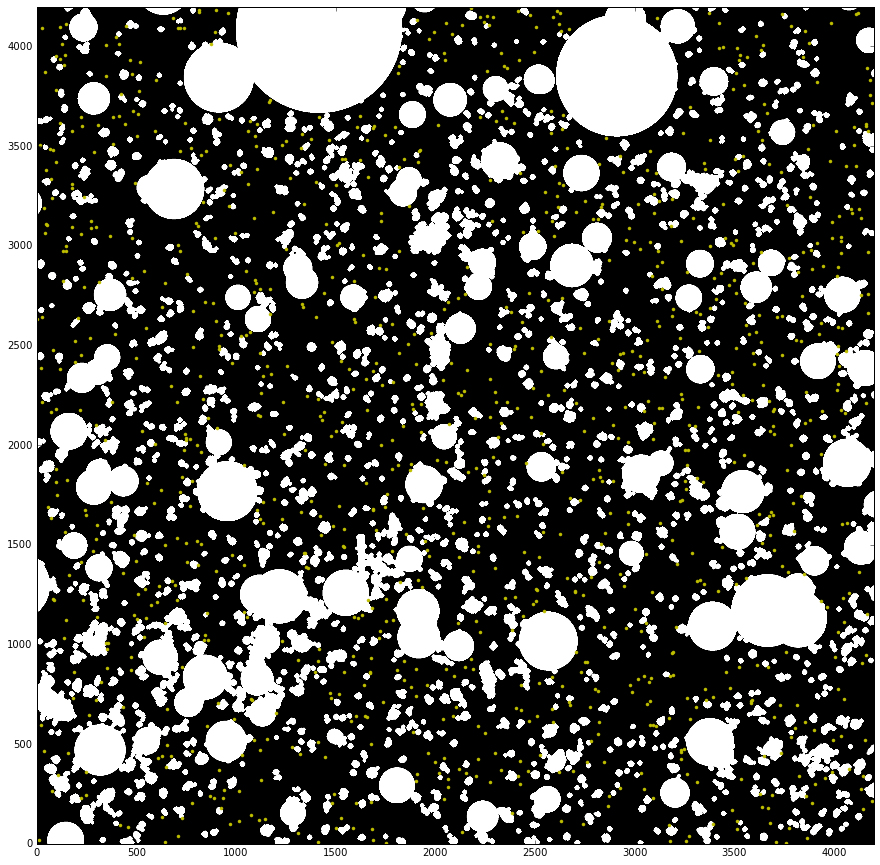

In [7]:
plt.figure(figsize=(15, 15))
plt.imshow(mask_arr, origin='lower', cmap='gray')
plt.plot(pixels[:,0], pixels[:,1], 'y.')
plt.xlim(0, img_width-1)
plt.ylim(0, img_height-1)

In [9]:
config.reset_mask_planes()
butler = lsst.daf.persistence.Butler('/tigress/HSC/HSC/rerun/production-20160523')
exp = butler.get('deepCoadd_calexp', tract=9454, patch='7,8', filter='HSC-I', immediate=True)

In [98]:
df_test = hp.randoms.find_randoms_in_footprint('/tigress/jgreco/randoms/randoms-safe-36000-bkcup.db', exp, False)

(0, 4099)

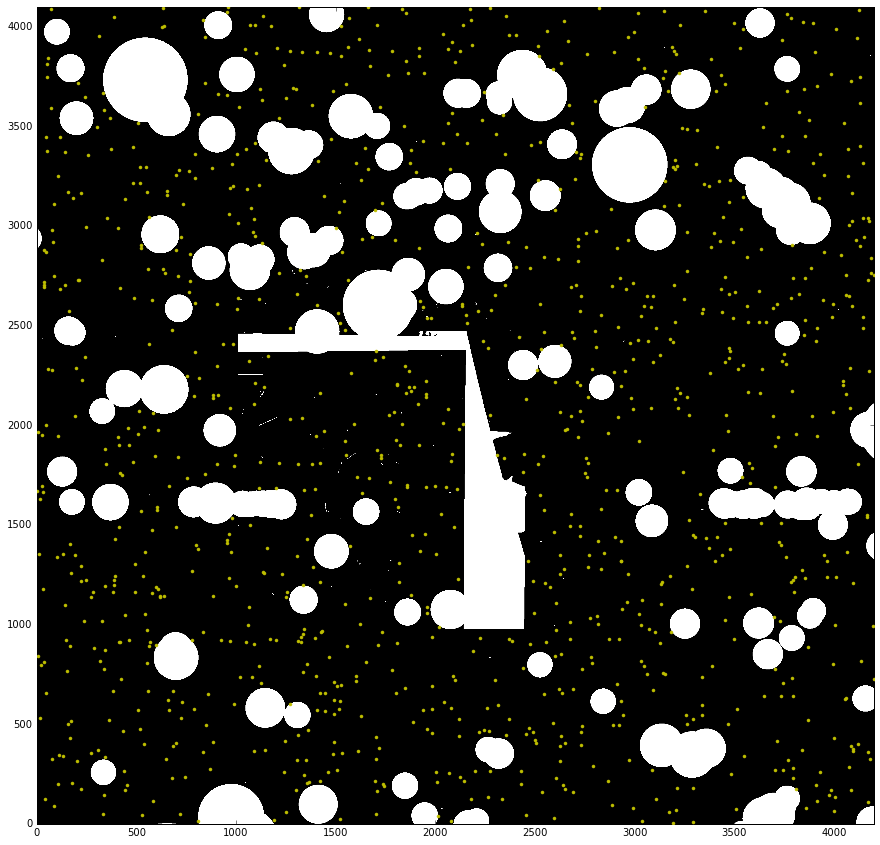

In [15]:
xy0 = exp.getXY0()
wcs = exp.getWcs()

coords = lsstutils.make_afw_coords(df_test.loc[df_test['detected']==1, ['ra', 'dec']].values)
pixels = [wcs.skyToPixel(coord) - xy0 for coord in coords]
pixels = [(pix.getX(), pix.getY()) for pix in pixels]
pixels = np.array(pixels)

mask = exp.getMaskedImage().getMask()
mask_arr = hp.randoms.get_mask_array(exp)

img_width = exp.getWidth()
img_height = exp.getHeight()

plt.figure(figsize=(15, 15))
plt.imshow(mask_arr, origin='lower', cmap='gray')
plt.plot(pixels[:,0], pixels[:,1], 'y.', zorder=100)
plt.xlim(0, img_width-1)
plt.ylim(0, img_height-1)